# Import Libraries

In [1]:
import tensorflow as tf
import zipfile
import numpy as np
import random
import os
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Generate Mask

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

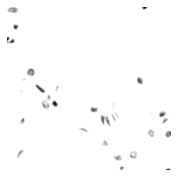

In [19]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
plt.figure(figsize=(3, 3))
other_dir = 'dataset/train/not cancer/mask'
for x in range(1, 101, 1):
    path = "dataset/train/not cancer/a ("+ str(x)+ ").jpeg"
    
    # Reading an image in default mode
    image = cv2.imread(path)
    image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    figure_size = 9
    new_image = cv2.blur(image2,(figure_size, figure_size))
    # define the mask
    mask = np.array([[0.4125,0.3576,0.1804],
                     [0.2127,0.7152,0.0722],
                     [0.0193,0.1192,0.9502]])

    # Window name in which image is displayed
    window_name = 'image'
    filtered_img = cv2.filter2D(new_image, -1, mask)
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')
    #plt.figure(figsize=(6, 6))
    plt.savefig(f'{other_dir}/a ({str(x)}).png',bbox_inches='tight')

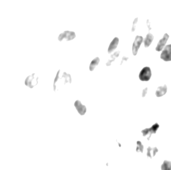

In [20]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
plt.figure(figsize=(3, 3))
other_dir = 'dataset/train/With Cancer/mask'
for x in range(1, 101, 1):
    path = "dataset/train/With Cancer/a ("+ str(x)+ ").jpeg"
    
    # Reading an image in default mode
    image = cv2.imread(path)
    image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    figure_size = 9
    new_image = cv2.blur(image2,(figure_size, figure_size))
    # define the mask
    mask = np.array([[0.4125,0.3576,0.1804],
                     [0.2127,0.7152,0.0722],
                     [0.0193,0.1192,0.9502]])

    # Window name in which image is displayed
    window_name = 'image'
    filtered_img = cv2.filter2D(new_image, -1, mask)
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')
    #plt.figure(figsize=(6, 6))
    plt.savefig(f'{other_dir}/a ({str(x)}).png',bbox_inches='tight')

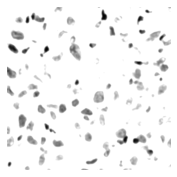

In [21]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
plt.figure(figsize=(3, 3))
other_dir = 'dataset/test/With Cancer/mask'
for x in range(1, 26, 1):
    path = "dataset/test/With Cancer/a ("+ str(x)+ ").jpeg"
    
    # Reading an image in default mode
    image = cv2.imread(path)
    image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    figure_size = 9
    new_image = cv2.blur(image2,(figure_size, figure_size))
    # define the mask
    mask = np.array([[0.4125,0.3576,0.1804],
                     [0.2127,0.7152,0.0722],
                     [0.0193,0.1192,0.9502]])

    # Window name in which image is displayed
    window_name = 'image'
    filtered_img = cv2.filter2D(new_image, -1, mask)
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')
    #plt.figure(figsize=(6, 6))
    plt.savefig(f'{other_dir}/a ({str(x)}).png',bbox_inches='tight')

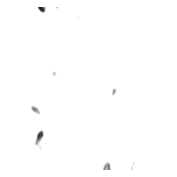

In [23]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
plt.figure(figsize=(3, 3))
other_dir = 'dataset/test/not Cancer/mask'
for x in range(1, 26, 1):
    path = "dataset/test/not Cancer/a ("+ str(x)+ ").jpeg"
    
    # Reading an image in default mode
    image = cv2.imread(path)
    image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    figure_size = 9
    new_image = cv2.blur(image2,(figure_size, figure_size))
    # define the mask
    mask = np.array([[0.4125,0.3576,0.1804],
                     [0.2127,0.7152,0.0722],
                     [0.0193,0.1192,0.9502]])

    # Window name in which image is displayed
    window_name = 'image'
    filtered_img = cv2.filter2D(new_image, -1, mask)
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')
    #plt.figure(figsize=(6, 6))
    plt.savefig(f'{other_dir}/a ({str(x)}).png',bbox_inches='tight')

# <div id="chap2">Load Data</div>

In [2]:
SEED = 42
np.random.seed = SEED

TRAIN_PATH = 'Dataset/train/'
TEST_PATH = 'Dataset/test/'

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [3]:
# get list of all subfolders
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [4]:
# define placeholders (also used to replace NaN in images to resize by 0)
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype = np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype = np.bool)

# <div id="chap3">Get Masks</div>

In [5]:
# Resize images and masks
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    
    path = TRAIN_PATH + id_
    img = imread(path + '/a (' + str(n+1) + ').jpeg')[:, :, :IMG_CHANNELS]
    img = resize(
        img, (IMG_HEIGHT, IMG_WIDTH), 
        mode = 'constant', 
        preserve_range = True
    )
    
    X_train[n] = img # fill empty X_train with values from img 
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype = np.bool)
    
    print(path)
    mask_ = imread(path + '/mask/a (' + str(n+1) + ').png')[2]
    mask_ = np.expand_dims(
            resize(
                mask_, 
                (IMG_HEIGHT, IMG_WIDTH), 
                mode = 'constant', 
                preserve_range = True
            ), 
            axis = -1
        )
    mask = np.maximum(mask, mask_)
    
    Y_train[n] = mask
    
    
    

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.74it/s]

Dataset/train/not cancer


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.69it/s]

Dataset/train/With Cancer


In [6]:
# test images
X_test = np.zeros(
    (
        len(test_ids), 
        IMG_HEIGHT, 
        IMG_WIDTH, 
        IMG_CHANNELS
    ), 
    dtype = np.uint8
)

Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype = np.bool)

sizes_test = []
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/a (' + str(n+1) + ').jpeg')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(
        img, 
        (IMG_HEIGHT, IMG_WIDTH), 
        mode = 'constant', 
        preserve_range = True
    )
    X_test[n] = img
    
    mask_ = imread(path + '/mask/a (' + str(n+1) + ').png')[2]
    mask_ = np.expand_dims(
            resize(
                mask_, 
                (IMG_HEIGHT, IMG_WIDTH), 
                mode = 'constant', 
                preserve_range = True
            ), 
            axis = -1
        )
    mask = np.maximum(mask, mask_)
    
    Y_test[n] = mask

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.89it/s]


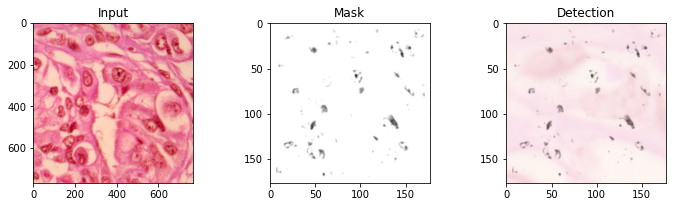

In [7]:
import cv2
plt.figure(figsize=(12, 10))
plt.subplot(3,3,1)
plt.title('Input')
img = cv2.imread('Dataset/train/With Cancer/a (1).jpeg')
plt.imshow(img)

plt.subplot(3,3,2)
imgs = cv2.imread('Dataset/train/With Cancer/mask/a (1).png')
plt.title('Mask')
plt.imshow(imgs)

plt.subplot(3,3,3)
plt.title('Detection')
plt.imshow(img,cmap='gray')
mask = np.ma.masked_where(imgs == False, imgs)
plt.imshow(mask, alpha=0.8, cmap='Set1')

# <div id="chap4">4. Training Model</div>

In [8]:
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x/255.0)(inputs) # normalization

# Contraction path
c1 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(s) # start with normal distributed weights
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c5)

# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides = (2,2), padding = "same")(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c9)

outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [9]:
# Callbacks
checkpoiter = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose = 1, save_best_only = True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir = 'logs')
            ]

In [10]:
results = model.fit(
    X_train, 
    Y_train, 
    validation_split = 0.1, 
    batch_size = 16, 
    epochs = 25, 
    callbacks = callbacks)

Epoch 1/25
1/1 [==============================] - 7s 7s/step - loss: 0.6574 - accuracy: 0.6700 - val_loss: 0.5702 - val_accuracy: 0.9803
Epoch 2/25
1/1 [==============================] - 1s 1s/step - loss: 0.5371 - accuracy: 0.9573 - val_loss: 0.4958 - val_accuracy: 0.9930
Epoch 3/25
1/1 [==============================] - 0s 373ms/step - loss: 0.4186 - accuracy: 0.9922 - val_loss: 0.3694 - val_accuracy: 0.9981
Epoch 4/25
1/1 [==============================] - 0s 405ms/step - loss: 0.2508 - accuracy: 0.9961 - val_loss: 0.1402 - val_accuracy: 0.9991
Epoch 5/25
1/1 [==============================] - 1s 569ms/step - loss: 0.0658 - accuracy: 0.9908 - val_loss: 0.0134 - val_accuracy: 0.9980
Epoch 6/25
1/1 [==============================] - 0s 383ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0031 - val_accuracy: 0.9988
Epoch 7/25
1/1 [==============================] - 0s 364ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 3.2815e-04 - val_accuracy: 1.0000
Epoch 8/25
1/1 [======

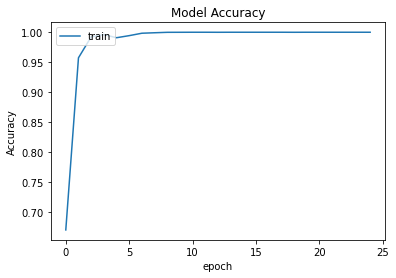

In [11]:
plt.plot(results.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

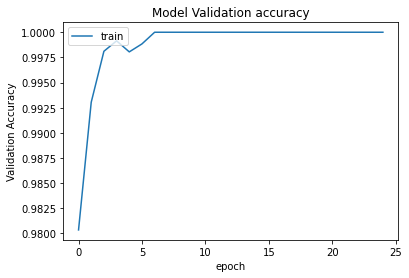

In [12]:
plt.plot(results.history['val_accuracy'])
plt.title('Model Validation accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

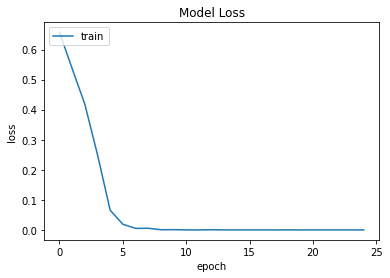

In [13]:
plt.plot(results.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

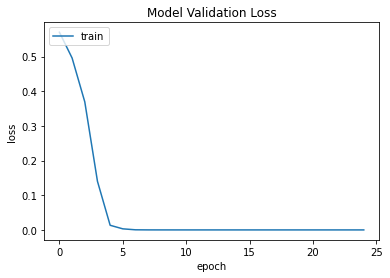

In [14]:
plt.plot(results.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluating on test set


In [15]:
results = model.evaluate(X_train, Y_train, batch_size=16)
print('loss,dice_coeff:', results)

1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - accuracy: 1.0000
loss,dice_coeff: [0.0, 1.0]


Making Predictions

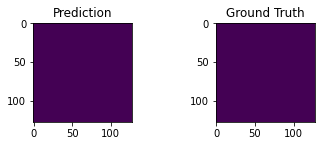

In [16]:
predictions = model.predict(X_test[0:2,:])
plt.subplot(221)
plt.title('Prediction')
plt.imshow(predictions[0,:,:,0])
plt.subplot(222)
plt.title('Ground Truth')
plt.imshow(Y_test[0,:,:,0])